In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.width', 1000)
pd.set_option('display.precision', 1)

In [2]:
data = pd.read_csv('./data/adult.data')
cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'label']
data = data[cols]
data

,age,education_num,capital_gain,capital_loss,hours_per_week,label
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K
32557,40,9,0,0,40,>50K
32558,58,9,0,0,40,<=50K
32559,22,9,0,0,20,<=50K


In [3]:
# 将文字变量转化为数字变量
data['label_code'] = pd.Categorical(data.label).codes
data[['label', 'label_code']]

,label,label_code
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
...,...,...
32556,<=50K,0
32557,>50K,1
32558,<=50K,0
32559,<=50K,0


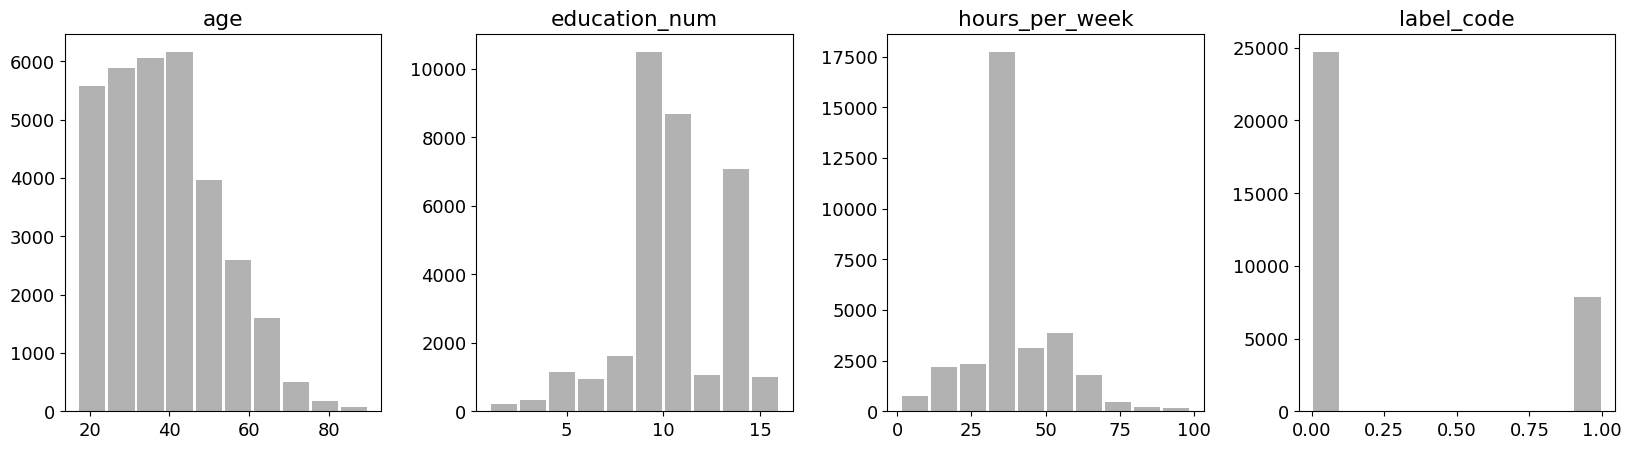

In [4]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 4, figsize=(20, 5), dpi=100)
hist_data = data[['age', 'education_num', 'hours_per_week', 'label_code']]
hist_data.hist(rwidth=0.9, grid=False, alpha=0.6, color='grey', ax=ax)
plt.savefig('logit_hist.png', dpi=200)
plt.show()

In [5]:
# 通过统计方法，了解数据性质
# 显示基本统计信息
data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,label_code
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.6,10.1,1077.6,87.3,40.4,0.2
std,13.6,2.6,7385.3,403.0,12.3,0.4
min,17.0,1.0,0.0,0.0,1.0,0.0
25%,28.0,9.0,0.0,0.0,40.0,0.0
50%,37.0,10.0,0.0,0.0,40.0,0.0
75%,48.0,12.0,0.0,0.0,45.0,0.0
max,90.0,16.0,99999.0,4356.0,99.0,1.0


In [6]:
# 计算hours_per_week, label交叉报表
cut = pd.cut(data['hours_per_week'], 5, precision=1)
cross = pd.crosstab(cut, data['label'])
# 将交叉报表归一化，利于分析数据
cross_norm = cross.div(cross.sum(1).astype(float), axis=0)
cross_norm    

label,<=50K,>50K
hours_per_week,,
"(0.9, 20.6]",0.9,6.7e-02
"(20.6, 40.2]",0.8,1.9e-01
"(40.2, 59.8]",0.6,4.0e-01
"(59.8, 79.4]",0.6,4.2e-01
"(79.4, 99.0]",0.6,3.5e-01


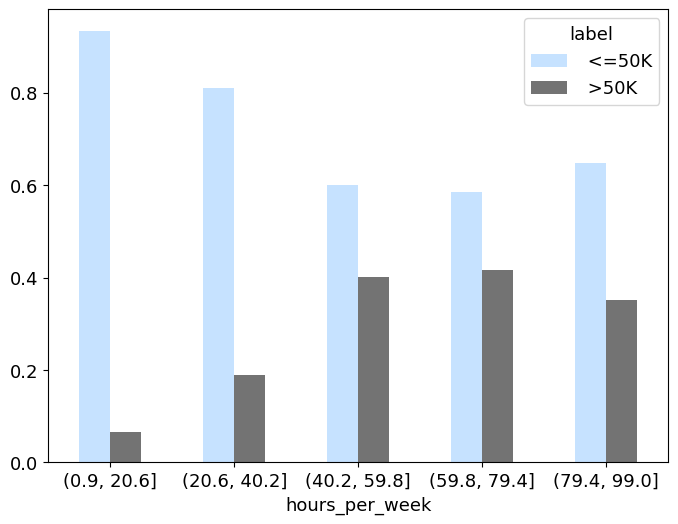

In [7]:
# 图形化归一化后的交叉报表
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
cross_norm.plot(kind='bar', color=['#C6E2FF', '0.45'], rot=0, ax=ax)
plt.savefig('logit_mosaic.png', dpi=200)
plt.show()

In [8]:
# 计算education_num, label交叉报表
## 为了展示美观，手动定义labels
bins = [0, 0.25, 0.5, 0.75, 1]
_, edges = pd.qcut(data['education_num'], bins, precision=3, retbins=True)
labels = []
for i in range(len(edges) - 1):
    if i == 0:
        labels.append(f'[{int(edges[i])}, {int(edges[i+1])}]')
    else:
        labels.append(f'({int(edges[i])}, {int(edges[i+1])}]')
cut1 = pd.qcut(data['education_num'], bins, labels=labels)
cross1 = pd.crosstab(cut1, data['label'])
cross1

label,<=50K,>50K
education_num,,
"[1, 9]",12835,1919
"(9, 10]",5904,1387
"(10, 12]",1823,626
"(12, 16]",4158,3909


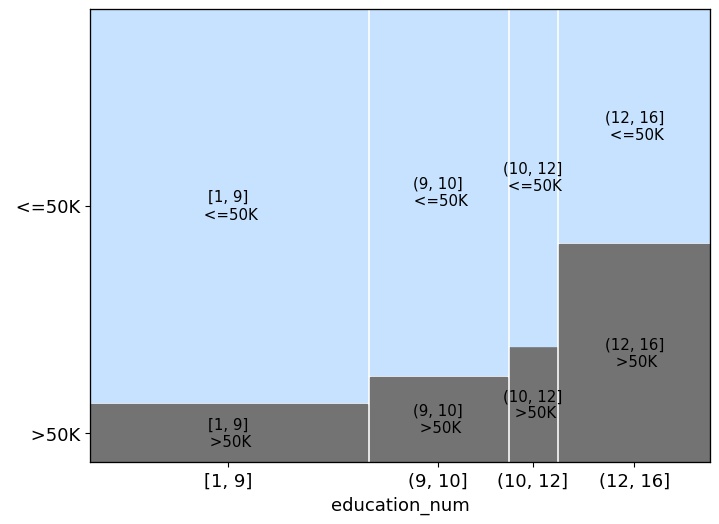

In [9]:
# 将交叉报表图形化
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
props = lambda key: {'color': '0.45'} if ' >50K' in key else {'color': '#C6E2FF'}
mosaic(cross1[[' >50K', ' <=50K']].stack(), properties=props, ax=ax)
ax.set_xlabel(cross1.index.name)
plt.savefig('logit_mosaic2.png', dpi=200)
plt.show()

In [10]:
# 将数据分为训练集和测试集
train_set, test_set = train_test_split(data, test_size=0.2, random_state=2310)

In [11]:
# 训练模型并分析模型效果
formula = 'label_code ~ age + education_num + capital_gain + capital_loss + hours_per_week'
model = sm.Logit.from_formula(formula, data=data)
re = model.fit()
print(re.summary())

Optimization terminated successfully.
         Current function value: 0.406725
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             label_code   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32555
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.2632
Time:                        15:43:02   Log-Likelihood:                -13243.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.3157      0.115    -72.240      0.000      -8.541      -8.090
age              

In [12]:
# 用f test检验education_num的系数是否显著
print('检验假设education_num的系数等于0：')
print(re.f_test('education_num=0'))
# 用f test检验两个假设是否同时成立
print('检验假设education_num的系数等于0.32和hours_per_week的系数等于0.04同时成立：')
print(re.f_test('education_num=0.32, hours_per_week=0.04'))

检验假设education_num的系数等于0：
<F test: F=2243.090738470156, p=0.0, df_denom=3.26e+04, df_num=1>
检验假设education_num的系数等于0.32和hours_per_week的系数等于0.04同时成立：
<F test: F=0.230516045737942, p=0.794124988795008, df_denom=3.26e+04, df_num=2>


In [13]:
# 理解模型结果
pd.set_option('display.precision', 4)
conf = re.conf_int()
conf['OR'] = re.params
# 计算各个变量对事件发生比的影响
# conf里的三列：置信区间的下界、上界和估计值
conf.columns = ['2.5%', '97.5%', 'OR']
# 各个变量对事件发生比的影响
print(np.exp(conf))

                  2.5%   97.5%      OR
Intercept       0.0002  0.0003  0.0002
age             1.0415  1.0465  1.0440
education_num   1.3626  1.3995  1.3809
capital_gain    1.0003  1.0003  1.0003
capital_loss    1.0006  1.0008  1.0007
hours_per_week  1.0389  1.0443  1.0416


In [14]:
# 计算各个变量的边际效应
print(re.get_margeff(at='overall').summary())

        Logit Marginal Effects       
Dep. Variable:             label_code
Method:                          dydx
At:                           overall
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0055      0.000     37.227      0.000       0.005       0.006
education_num      0.0415      0.001     53.118      0.000       0.040       0.043
capital_gain    4.099e-05   1.17e-06     34.942      0.000    3.87e-05    4.33e-05
capital_loss    8.991e-05   4.08e-06     22.062      0.000    8.19e-05    9.79e-05
hours_per_week     0.0052      0.000     32.171      0.000       0.005       0.006


In [15]:
# 使用训练好的模型对测试数据做预测
# 计算事件发生的概率
test_set['prob'] = re.predict(test_set)
print('事件发生概率（预测概率）大于0.6的数据个数：')
print(test_set[test_set['prob'] > 0.6].shape[0])
print('事件发生概率（预测概率）大于0.5的数据个数：')
print(test_set[test_set['prob'] > 0.5].shape[0])
# 根据预测的概率，得出最终的预测
alpha=0.5
test_set['pred'] = test_set.apply(lambda x: 1 if x['prob'] > alpha else 0, axis=1)

事件发生概率（预测概率）大于0.6的数据个数：
584
事件发生概率（预测概率）大于0.5的数据个数：
846


In [16]:
# 计算预测结果的查准查全率以及f1
bins = np.array([0, 0.5, 1])
label = test_set['label_code']
pred = test_set['pred']
tn, fp, fn, tp = np.histogram2d(label, pred, bins=bins)[0].flatten()
precision = tp / (tp + fp) 
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
print('查准率: %.3f, 查全率: %.3f, f1: %.3f' % (precision, recall, f1))

查准率: 0.702, 查全率: 0.377, f1: 0.491
